# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 186 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

Argentina data will be recovered from sources in https://www.argentina.gob.ar/coronavirus/informe-diario as it contemplates more updated data, and is more specific than other data. Other data will be used for comparison.

In [179]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")

In [180]:
arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

argentina_total = 0
total_list = []
for index, rows in arg_confirmed.iterrows():
    for date, cases in rows.items():
        argentina_total += cases
        total_list.append({date: argentina_total})

tot_cases = np.diag(pd.DataFrame(total_list))
arg_confirmed_ts = arg_confirmed.copy()

i = 0
for index, rows in arg_confirmed_ts.iterrows():
    print(index)
    for date, cases in rows.items():
        arg_confirmed_ts.at[index, date] = tot_cases[i]
        i += 1
    
tot_days = np.size(arg_confirmed_ts, axis = 1)
arg_confirmed_ts

Argentina


,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Argentina,1,1,2,8,9,12,17,19,21,31,...,225,266,302,388,505,592,709,764,837,983


In [181]:
from IPython.display import Markdown

Markdown("""
Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is {total} 
""".format(total=argentina_total))


Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is 983 


## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

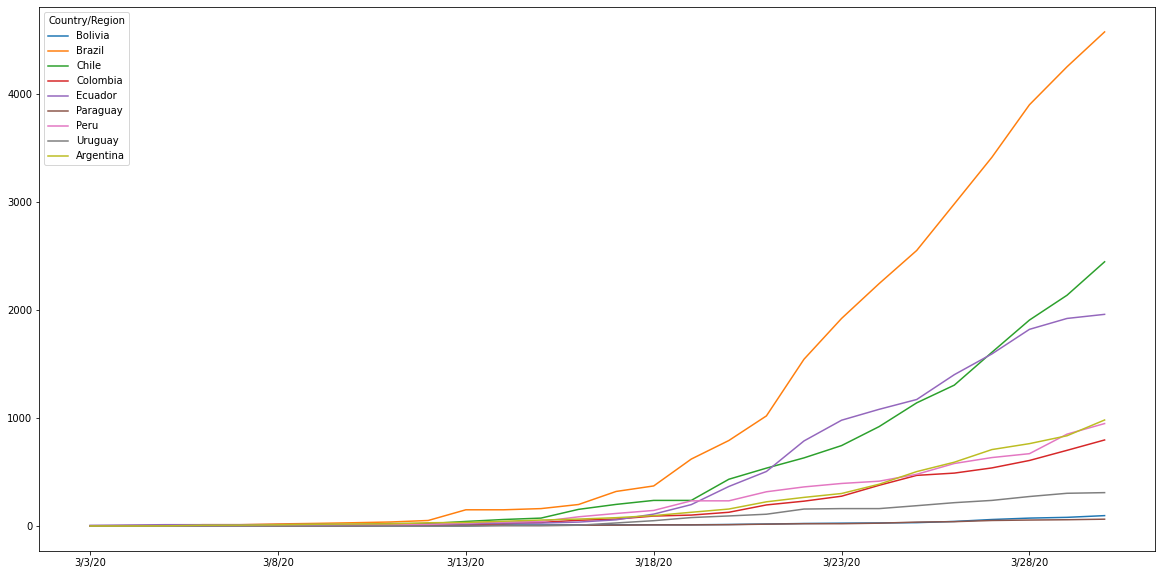

In [182]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_confirmed_cases = latam_confirmed_cases[41:]
latam_confirmed_cases = latam_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
latam_confirmed_cases.plot(figsize=(20,10))

#### Total confirmed cases over 1M population

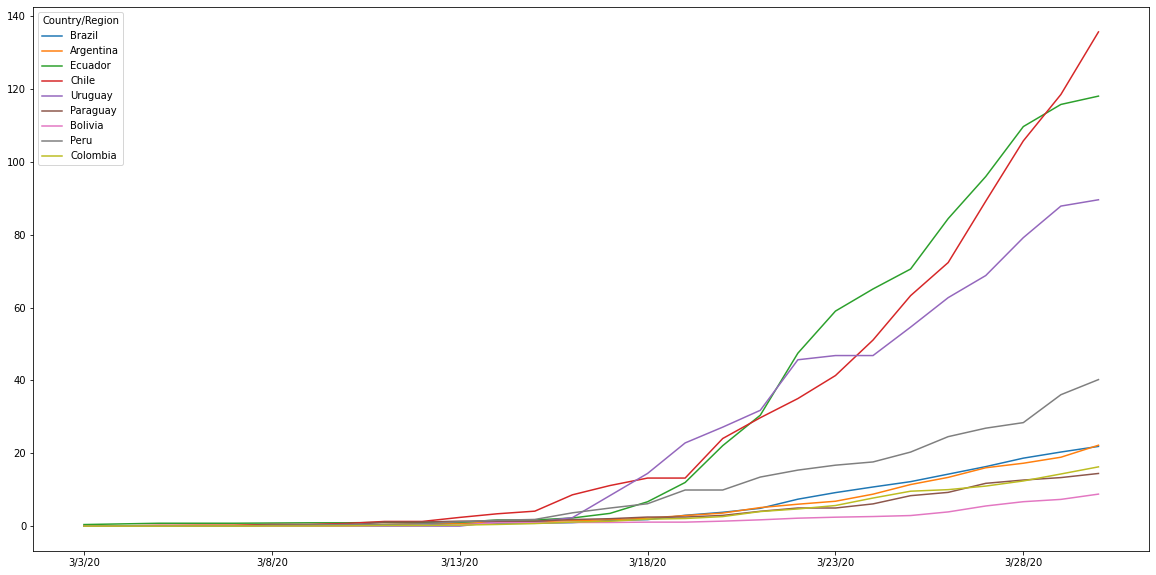

In [183]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Argentina and european countries

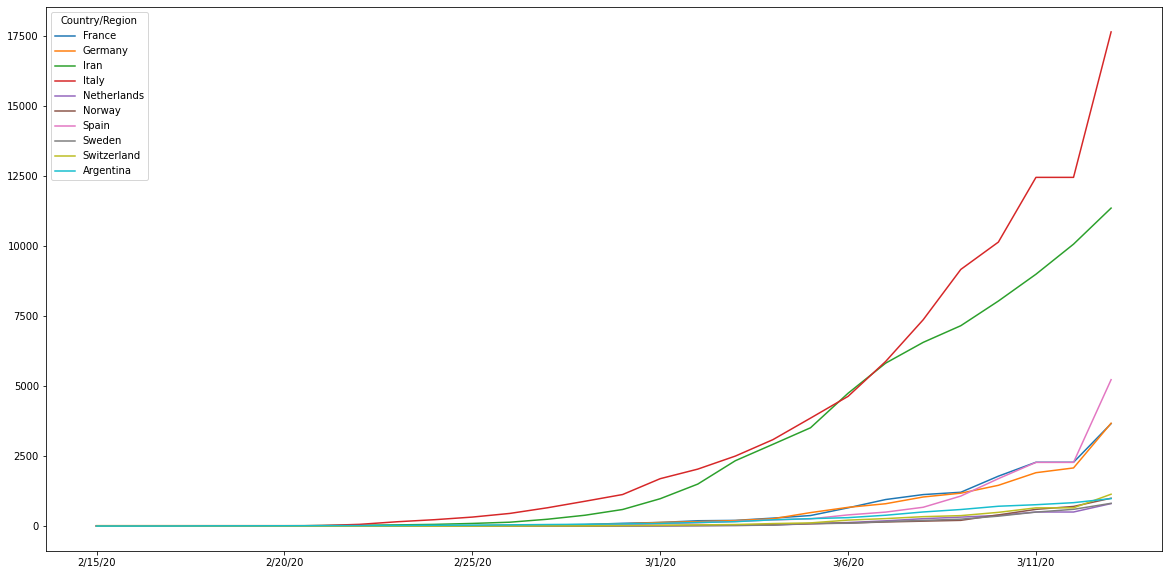

In [184]:
euro_countries = ['Italy', 'Iran', 'Spain', 'Germany', 'France', 'Switzerland', 'UK', 'Netherlands', 'Norway', 'Sweden']
euro_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(euro_countries)]
euro_confirmed_cases = euro_confirmed_cases.loc[(euro_confirmed_cases['Province/State']).isna()]
euro_confirmed_cases = euro_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis = 1)
euro_confirmed_cases = euro_confirmed_cases.set_index('Country/Region')
euro_confirmed_cases = euro_confirmed_cases.transpose()

euro_confirmed_cases = euro_confirmed_cases[24:]
euro_confirmed_cases = euro_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
euro_confirmed_cases['Argentina'] = euro_confirmed_cases['Argentina'].shift(-17)
euro_confirmed_cases = euro_confirmed_cases[:tot_days]
euro_confirmed_cases.plot(figsize=(20,10))


#### Total confirmed cases over 1M population

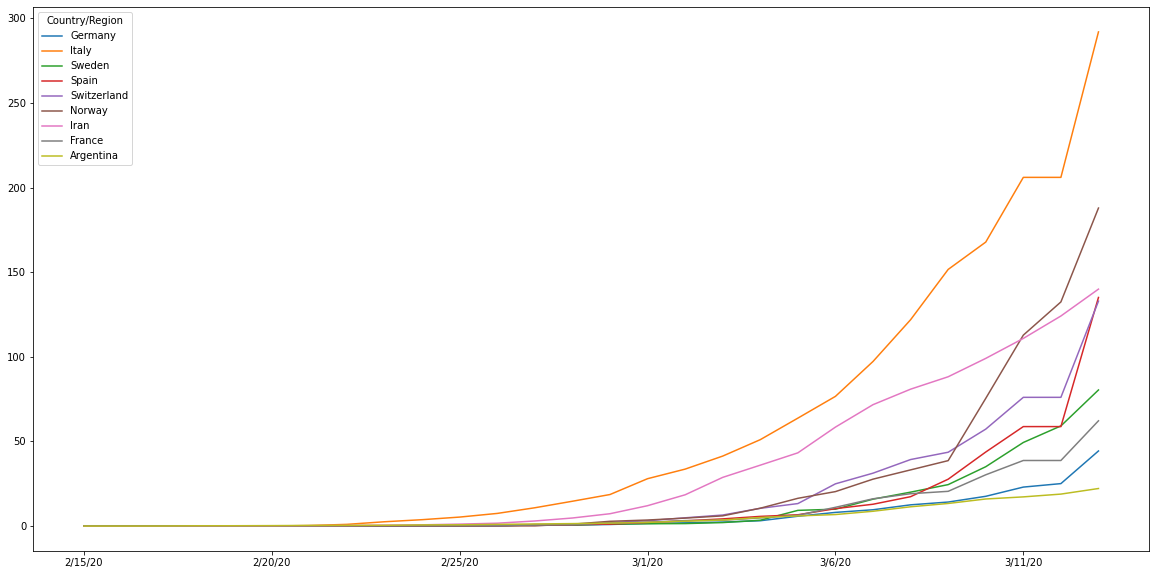

In [185]:
total_populations_eu = {
    'Germany': 82.79,
    'Italy': 60.48,
    'Sweden': 10.12,
    'Spain': 38.73,
    'Switzerland': 8.57,
    'Norway': 5.3,
    'Iran': 81.16,
    'France': 58.85,
    'Argentina': 44.27,
}

euro_confirmed_cases = euro_confirmed_cases.transpose()
euro_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_eu.items():
    country_cases = euro_confirmed_cases.loc[euro_confirmed_cases.index == country]
    euro_conf_cases_by_pop = euro_conf_cases_by_pop.append(country_cases.div(pop))
    
euro_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Predicting future outcomes with current data

### Incubation Period

Current data indicates that the mean incubation period is 5.2 days (95% confidence interval [CI], 4.1 to 7.0), with the 95th percentile of the distribution at 12.5 days. Data was taken from 425 confirmed cases

Source: https://www.nejm.org/doi/full/10.1056/NEJMoa2001316

If we take into account this numbers then we can try to predict when future cases will emerge, and consider different outcomes because of government actions.

See: https://www.usnews.com/news/world/articles/2020-03-15/argentina-to-close-its-borders-for-15-days-to-combat-coronavirus-president-fernandez-says
https://www.batimes.com.ar/news/argentina/argentina-to-close-schools-for-two-weeks-borders-to-visitors.phtml

Assuming a Gaussian distribution then for each day:

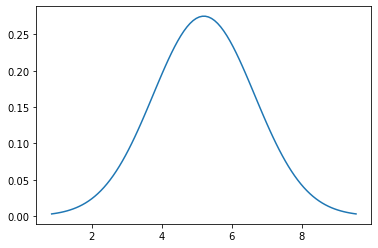

5.2 1.4500000000000002


In [186]:
import scipy.stats as stats

mu = 5.2
confirmed_cases = 425
max_mean = 7
min_mean = 4.1
sigma = (max_mean - min_mean)/2

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
print(mu, sigma)

### Daily new cases histogram in Argentina

We now present a histogram of the daily cases in Argentina. We must then analyze this data to predict future outcomes based on the incubation period described before.

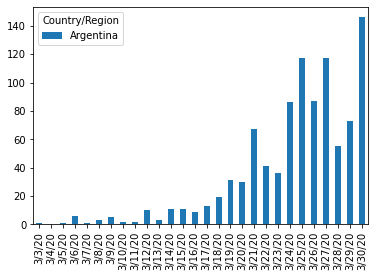

In [187]:
arg_confirmed.transpose().plot(kind="bar")

Assume the attack rate or transmissibility (Ro), which is, how rapidly the disease spreads, of 2. This represents the average number of people to which a single infected person will transmit the virus.

See: 

- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3524675

- https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/news--wuhan-coronavirus/

### Predicting outcomes with a constant positive transmission rate greather than 1

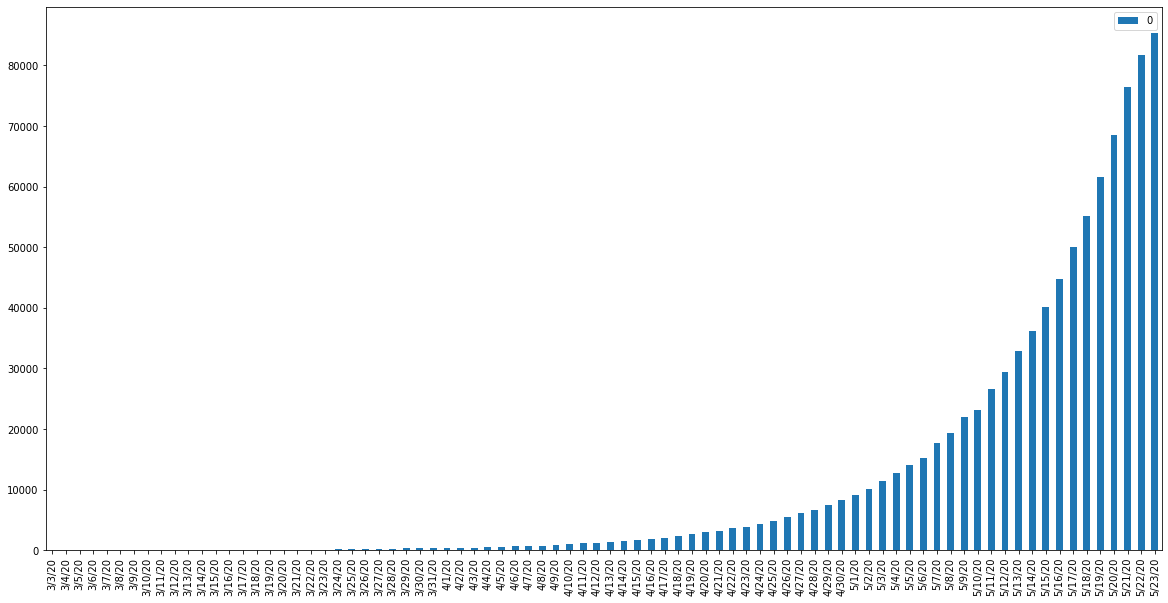

In [188]:
from datetime import datetime, timedelta
from collections import OrderedDict
from dateutil.parser import parse

def ro(curve, value = None, x = None):
    if curve == 'constant':
        # ro(x) = a
        key = "a"
        return value[key]
    elif curve == 'linear':
        # ro(x) = a*x + b
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*x + b
    elif curve == 'exponential':
        # ro(x) = a*exp(-bt)
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*np.exp(b*x)
    
def obtain_prediction(ro, ro_type, ro_value, init_date, list_dates, init_cases, max_iter = 90, force_end = False):
    days_passed = 0
    for i in range(0, len(list_dates)):
        date = list_dates[i]
        _date = date.strftime("%-m/%-d/%y")
        if _date in init_cases:
            new_cases = ro(ro_type, ro_value, days_passed)
            if(new_cases > 0.5 and new_cases < 1):
                new_cases = 1
            elif(new_cases < 0.5):
                new_cases = 0
                
            days_passed += 1
            gaussian = -1
            for __ in range(0, int(round(init_cases[_date]))):
                gaussian = np.random.normal(mu + days_passed, sigma)
                f_day = np.ceil(gaussian)
                end_date = init_date + timedelta(f_day)
                end_date = end_date.strftime("%-m/%-d/%y")
                if end_date in init_cases:
                    init_cases[end_date] = new_cases + init_cases[end_date]
                else:
                    init_cases[end_date] = new_cases
        
        if i > max_iter and new_cases < 20:
            break
        elif i > max_iter and force_end:
            break
    return OrderedDict(sorted(init_cases.items(), key = lambda x: parse(x[0])))

def get_clean_dict(arg_dataframe):
    dict_arg_confirmed = arg_dataframe.to_dict()
    temp = {}
    for date, cases in dict_arg_confirmed.items():
        for _, num_cases in cases.items():
            temp[date] = num_cases
    return temp

dict_arg_confirmed = get_clean_dict(arg_confirmed)

# Constrains
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
list_dates = pd.date_range(init_date, periods = 2000).tolist()

dict_arg_predicted = obtain_prediction(ro, 'constant', {"a": 2}, init_date, list_dates, dict_arg_confirmed, max_iter = 75, force_end = True)

arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

#todo
length = len(dict_arg_predicted)
bins = [k for k in range(1, length)]
confirmed = list(dict_arg_confirmed.values())
predicted = list(dict_arg_predicted.values())

# Graph if ro = 2
arg_predicted.transpose()[:-8].plot(kind="bar", figsize=(20, 10))

With a constant rate of transmission, greather than 1, it is evident that the amount of cases will grow exponentially, bounded by the total population.

### Predicting outcomes with a varying transmission rate

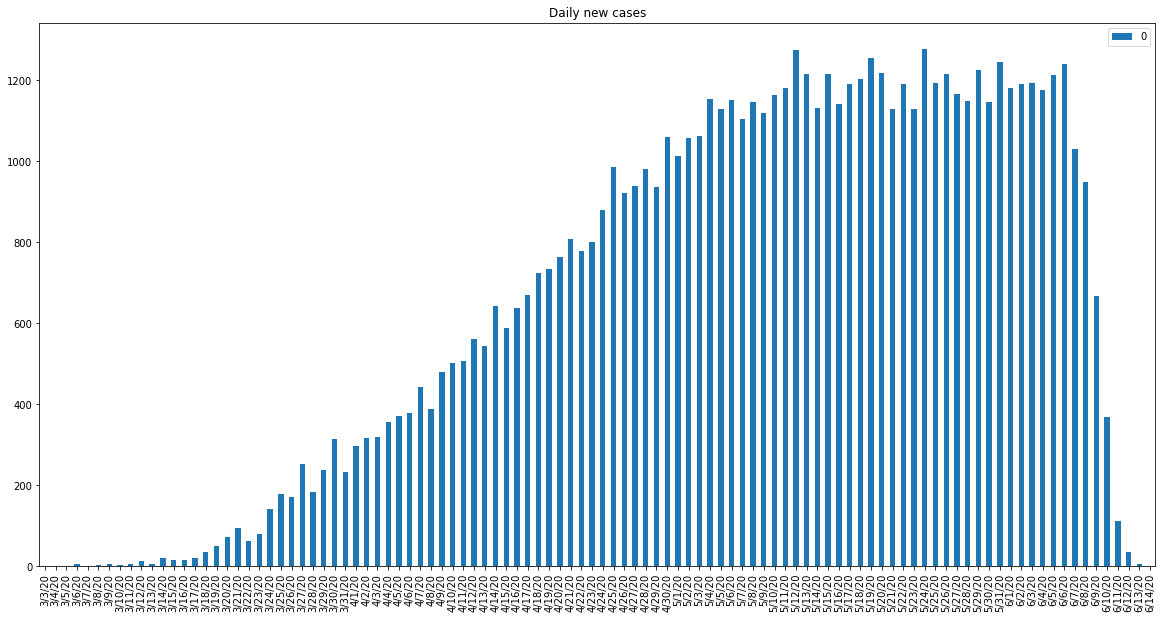

In [189]:
list_dates = pd.date_range(init_date, periods = 2000).tolist()
dict_arg_confirmed = get_clean_dict(arg_confirmed)
init_date = datetime.strptime('3/3/20', '%m/%d/%y')

# Bug: If dict_arg_confirmed is passed, the function predicts data over the current data
#      e.g: If date is 03/03/2020, current data for cases transmitted from that date is
#      already known (since the incubation period lasts until 17/03/2020 max. and data as of this
#      comment is at 30/03/2020), therefore the model should not predict cases if all possible predictable
#      cases for that date already exist! (do not predict cases from dates that already have an empirical value!)
#      Furthermore, empirical data can lead us to a better distribution for incubation period.
dict_arg_predicted = obtain_prediction(ro, 'exponential', {"a": 2, "b": -0.01}, init_date, list_dates, dict_arg_confirmed)
arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

arg_predicted.transpose().plot(kind="bar", figsize=(20, 10), title = "Daily new cases")

#### Finding the best exponential fit for current data

There are multiple models that could simulate the virus propagation, our task is to find the best model for the current known data.

In [190]:
list_dates = pd.date_range(init_date, periods = 2000).tolist()
dict_arg_confirmed = get_clean_dict(arg_confirmed)
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
samples = 100
totals_predicted = {}
average_predicted_list = []
a_vars = [x for x in np.arange(2, 3.5, 0.5)]
b_vars = [x for x in np.arange(-0.03, -0.02, 0.01)]
init_dict = {'3/3/20': 1}

for a in a_vars:
    for b in b_vars:
        for i in range(samples):
            dict_arg_predicted = obtain_prediction(ro, 'exponential', {"a": a, "b": b}, init_date, list_dates, init_dict)
            for date, cases in dict_arg_predicted.items():
                if date in totals_predicted:
                    totals_predicted[date] += cases
                else:
                    totals_predicted[date] = cases
            
            init_dict = {'3/3/20': 1}
            #dict_arg_confirmed = get_clean_dict(arg_confirmed)

        average_predicted = {k: round(v/samples, 0) for k, v in totals_predicted.items()}
        average_predicted_list.append(average_predicted)
        totals_predicted = {}

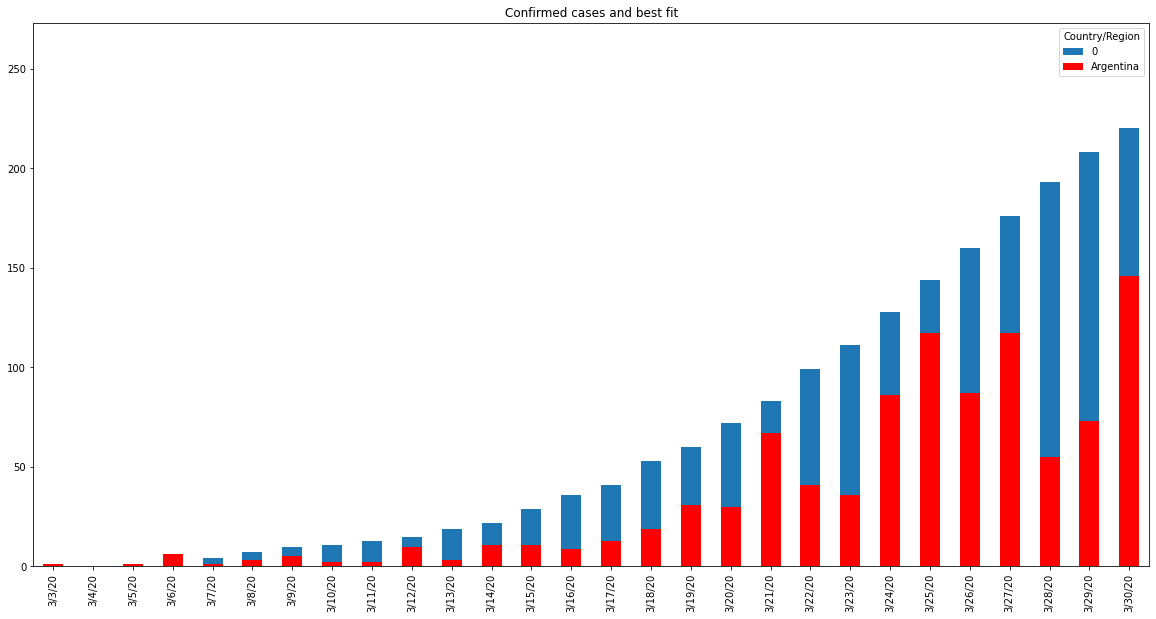

In [191]:
dict_arg_confirmed = get_clean_dict(arg_confirmed)
accum_dist = 0
best_dist = np.inf
best_average = {}

for average_predicted in average_predicted_list:
    avg_pre = OrderedDict(sorted(average_predicted.items(), key = lambda x: parse(x[0])))
    for date, cases in avg_pre.items():
        if date in dict_arg_confirmed:
            confirmed_cases = dict_arg_confirmed[date]
            accum_dist += (confirmed_cases - cases)**2

    if accum_dist < best_dist:
        best_dist = accum_dist
        best_average = avg_pre

    avg_pre_df = pd.DataFrame([avg_pre], columns=avg_pre.keys())
    accum_dist = 0

best_avg_df = pd.DataFrame([best_average], columns=best_average.keys())

fig = plt.figure()
ax = fig.add_subplot(111)
best_avg_df.transpose().plot(kind="bar", ax = ax, figsize=(20, 10), title = "Confirmed cases and best fit")
arg_confirmed.transpose().plot(kind="bar", ax = ax, figsize=(20, 10), color='red')

#### Best model 30/03/2020

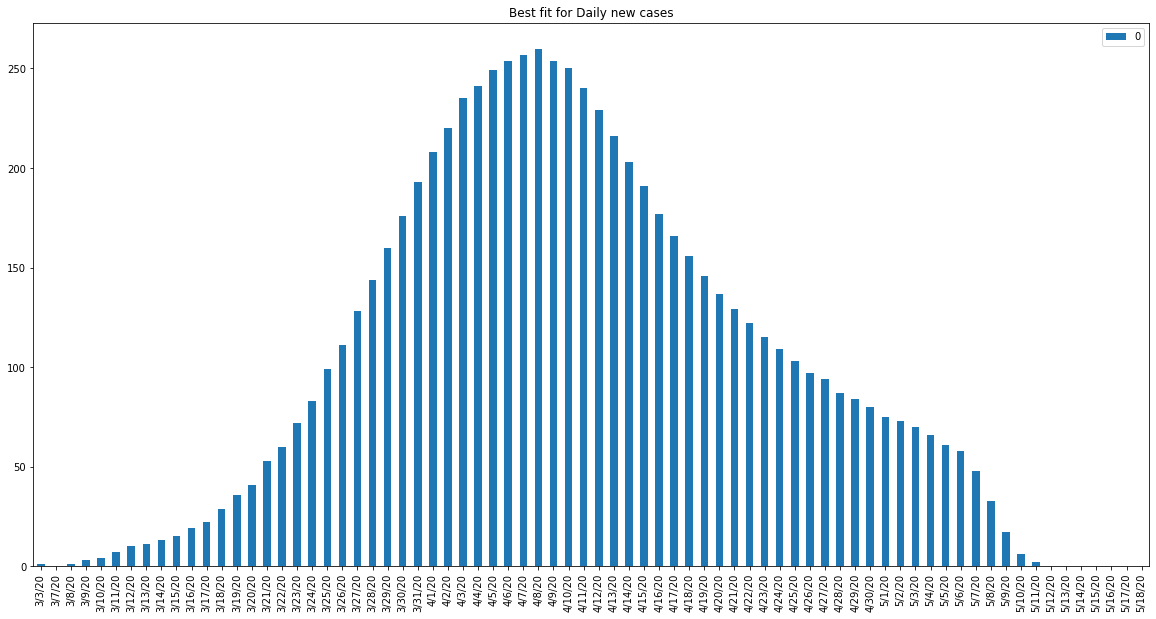

In [192]:
best_avg_df.transpose().plot(kind="bar", figsize=(20, 10), title="Best fit for Daily new cases")

This is the current best fit for the current data with $ 2 \leq a < 3.5 $ with $ 0.5 $ steps and $ b = -0.03 $ limiting runs because of poor computational proccessing power.

### Predicting outcomes with a discontinuous varying transmission rate

We look now to vary the transmission rate via a disctontinuous function, intending to get a more satisfying prediction for the quarantine measures taken in Argentina from 20/03/2020 onwards. The transmission rate should decrease significantly after the quarantine started.

In [193]:
# todo

### Predicting outcome via daily new cases data

Instead of trying to calculate the apparent transmission rate, we will now consider the daily new cases data and find a logistic model that fits it.

#### Logistic model

The logistic model is frequently used to model the growth of populations. It seems reasonable then to assume that the current pandemic, which grows as a pathogen in the population, can be modeled by it.

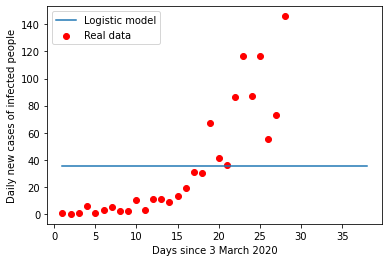

In [194]:
from scipy.optimize import curve_fit

def logistic_model(x, a, b, c):
    return c/(1 + np.exp( -(x-b) / a))

def line(x,m,n):
    return x*m+n

dict_arg_confirmed = get_clean_dict(arg_confirmed)
days_data = {}
day = 1
for date, cases in dict_arg_confirmed.items():
    days_data[day] = cases
    day += 1

days_data_df = pd.DataFrame([days_data], columns=days_data.keys())
x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 11)]
pred_x = x + fut_x

logistic_fit = curve_fit(logistic_model, x, y, maxfev = 1000)
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

# Real data
plt.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
plt.plot(pred_x, [logistic_model(i, logistic_fit[0][0], logistic_fit[0][1], logistic_fit[0][2]) for i in pred_x], label="Logistic model")

plt.legend()
plt.xlabel("Days since 3 March 2020")
plt.ylabel("Daily new cases of infected people")
plt.show()

#### Exponential model

The logistic model is of course more realistic because it stops at some time in the future, the exponential one is unbounded, therefore it is used to see the current growth and the expected number of cases in the near future, since it will always end up looking like a logistic anyways.

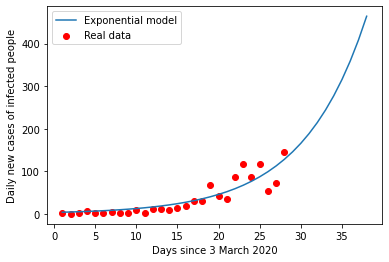

In [195]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

x = list(days_data.keys())
y = list(days_data.values())

fut_x = [i for i in range(x[-1] + 1, x[-1] + 11)]
pred_x = x + fut_x

exp_fit = curve_fit(exponential_model, x, y)

# Real data
plt.scatter(x, y, label="Real data", color="red")

# Predicted exponential curve
plt.plot(pred_x, [exponential_model(i, exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in pred_x], label="Exponential model")

plt.legend()
plt.xlabel("Days since 3 March 2020")
plt.ylabel("Daily new cases of infected people")
plt.show()

#### Residual analysis, errors and comparison of both models

In [196]:
# todo

## Getting actual infected cases from diagnosed cases


In [197]:
# todo

## Cases in Argentinian provinces

#### Daily cases time series for Argentina

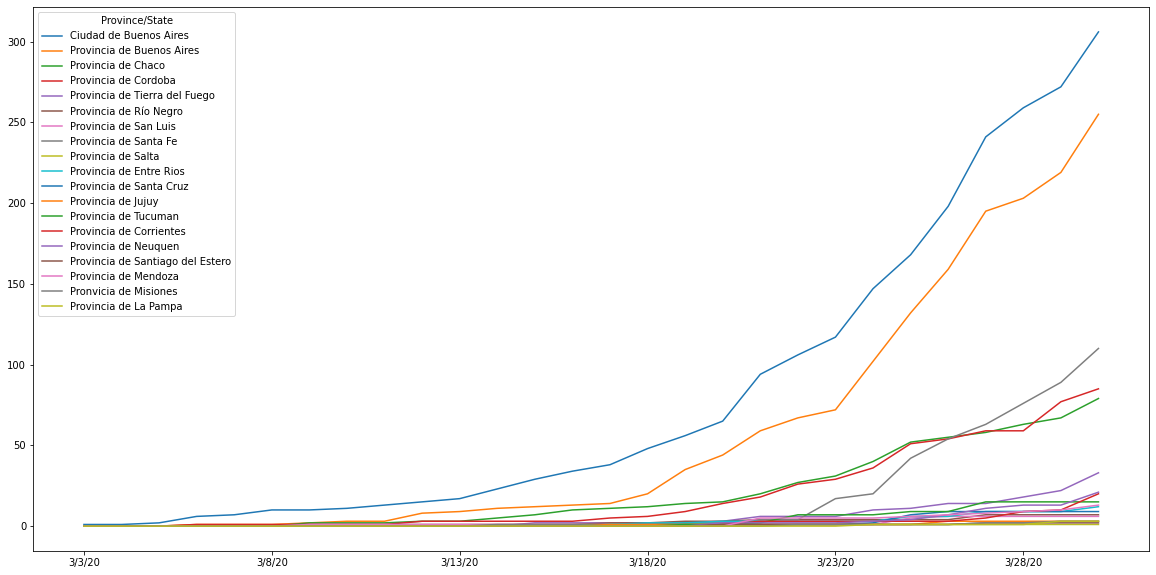

In [198]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_confirmed_cases = arg_confirmed_cases.drop(['Country/Region'], axis=1)
arg_confirmed_cases = arg_confirmed_cases.loc[arg_confirmed_cases['Province/State'] != 'All']
arg_confirmed_cases = arg_confirmed_cases.set_index('Province/State')

arg_confirmed_cases_copy = arg_confirmed_cases.copy()
arg_confirmed_ts = arg_confirmed_cases.copy()
total = 0
time_series_list = []
for index, rows in arg_confirmed_cases_copy.iterrows():
    cases_dict = {}
    for date, cases in rows.items():
        total += cases
        arg_confirmed_ts.at[index, date] = total
        
    total = 0

arg_confirmed_ts.transpose().plot(figsize = (20, 10))

In [199]:
from IPython.display import Markdown

infected_provinces = len(arg_confirmed_cases)
current_date = "30/03/2020"

Markdown("""
Argentina has 23 provinces and one autonomous city (city of Buenos Aires).
As of {current_date} the current provinces with COVID-19 confirmed cases are {infected_provinces}. 
""".format(infected_provinces=infected_provinces, current_date=current_date))


Argentina has 23 provinces and one autonomous city (city of Buenos Aires).
As of 30/03/2020 the current provinces with COVID-19 confirmed cases are 19. 


#### Total confirmed cases over 1M population

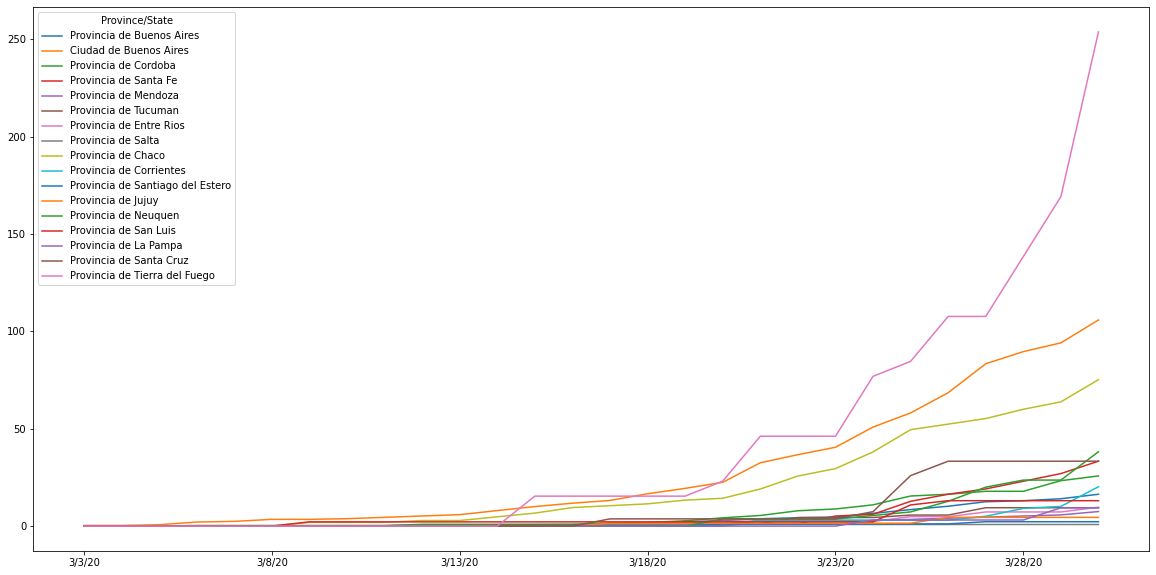

In [200]:
total_populations_arg = {
    'Provincia de Buenos Aires': 15.59,
    'Ciudad de Buenos Aires': 2.89,
    'Provincia de Cordoba': 3.30,
    'Provincia de Santa Fe': 3.30,
    'Provincia de Mendoza': 1.74,
    'Provincia de Tucuman': 1.59,
    'Provincia de Entre Rios': 1.24,
    'Provincia de Salta': 1.22,
    'Provincia de Misiones': 1.09,
    'Provincia de Chaco': 1.05,
    'Provincia de Corrientes': 0.99,
    'Provincia de Santiago del Estero': 0.89,
    'Provincia de San Juan': 0.68,
    'Provincia de Jujuy': 0.67,
    'Provincia de Rio Negro': 0.63,
    'Provincia de Neuquen': 0.55,
    'Provincia de Formosa': 0.53,
    'Provincia de Chubut': 0.50,
    'Provincia de San Luis': 0.46,
    'Provincia de Catamarca': 0.37,
    'Provincia de La Rioja': 0.33,
    'Provincia de La Pampa': 0.32,
    'Provincia de Santa Cruz': 0.27,
    'Provincia de Tierra del Fuego': 0.13
}

arg_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_arg.items():
    country_cases = arg_confirmed_ts.loc[arg_confirmed_ts.index == country]
    arg_conf_cases_by_pop = arg_conf_cases_by_pop.append(country_cases.div(pop))

arg_conf_cases_by_pop.transpose().plot(figsize = (20, 10))

#### Distribution of cases in each province

In [201]:
#labels = list(total_populations_arg.keys())
#sizes = []
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0, 0.1, 0, 0)
#for province in labels:
#    print(province)
#    print(arg_confirmed_ts.loc[arg_confirmed_cases['Province/State']])
#    prop = arg_confirmed_ts.loc[arg_confirmed_cases['Province/State'] == province]
    
    
#sizes = [40, 20, 20, 20]
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=90)
#plt.axis('equal')
#plt.title('Year 2013')
#plt.show()

## Applying the SIR model to Argentina
